In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('CC GENERAL.csv')

In [45]:
drop = df[df['CREDIT_LIMIT'].isnull()].index  # credit_limit가 결측치인 행 삭제
df.drop(drop, inplace = True)

In [46]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [47]:
df[df['MINIMUM_PAYMENTS'].isnull()]  # minimum_payments가 결측치인 값 0으로 수정(minimum_payments==0인 값 없음)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [48]:
df['MINIMUM_PAYMENTS'] = np.where(df['MINIMUM_PAYMENTS'].isnull(), 0, df['MINIMUM_PAYMENTS'])
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [49]:
df = df.drop(['CUST_ID'], axis = 1)  # customer segmentation에 필요 없는 cust id 열 삭제
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df = pd.DataFrame(ss.fit_transform(df), columns = df.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541


## PCA

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit(df)

PCA()

In [133]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.273 , 0.4762, 0.5644, 0.6392, 0.7013, 0.7586, 0.8074, 0.8507,
       0.8885, 0.9193, 0.943 , 0.9607, 0.975 , 0.9872, 0.9973, 1.    ,
       1.    ])

In [53]:
pca = PCA(n_components = 6)
x = pca.fit_transform(df)

In [54]:
pca_df = pd.DataFrame(data = x, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.684484,-1.070217,0.469997,0.686725,0.056054,0.080316
1,-1.132568,2.510222,0.603830,-0.104391,0.701248,-1.074136
2,0.968926,-0.383446,0.086174,1.252351,-2.160177,-0.394585
3,-0.897248,-0.017765,1.526944,1.031338,0.189523,-0.198575
4,-1.600519,-0.681375,0.340010,1.024974,-0.436711,0.078247
...,...,...,...,...,...,...
8944,-0.363616,-2.011357,-0.972364,-2.751540,0.025593,2.675851
8945,-0.590115,-1.696260,-1.188656,-2.046315,-0.239430,3.267278
8946,-0.929900,-1.806109,-0.456198,-2.306577,0.128605,2.984803
8947,-2.338056,-0.650937,0.980592,-1.844275,-0.171603,3.185369


## 1. K-means clustering

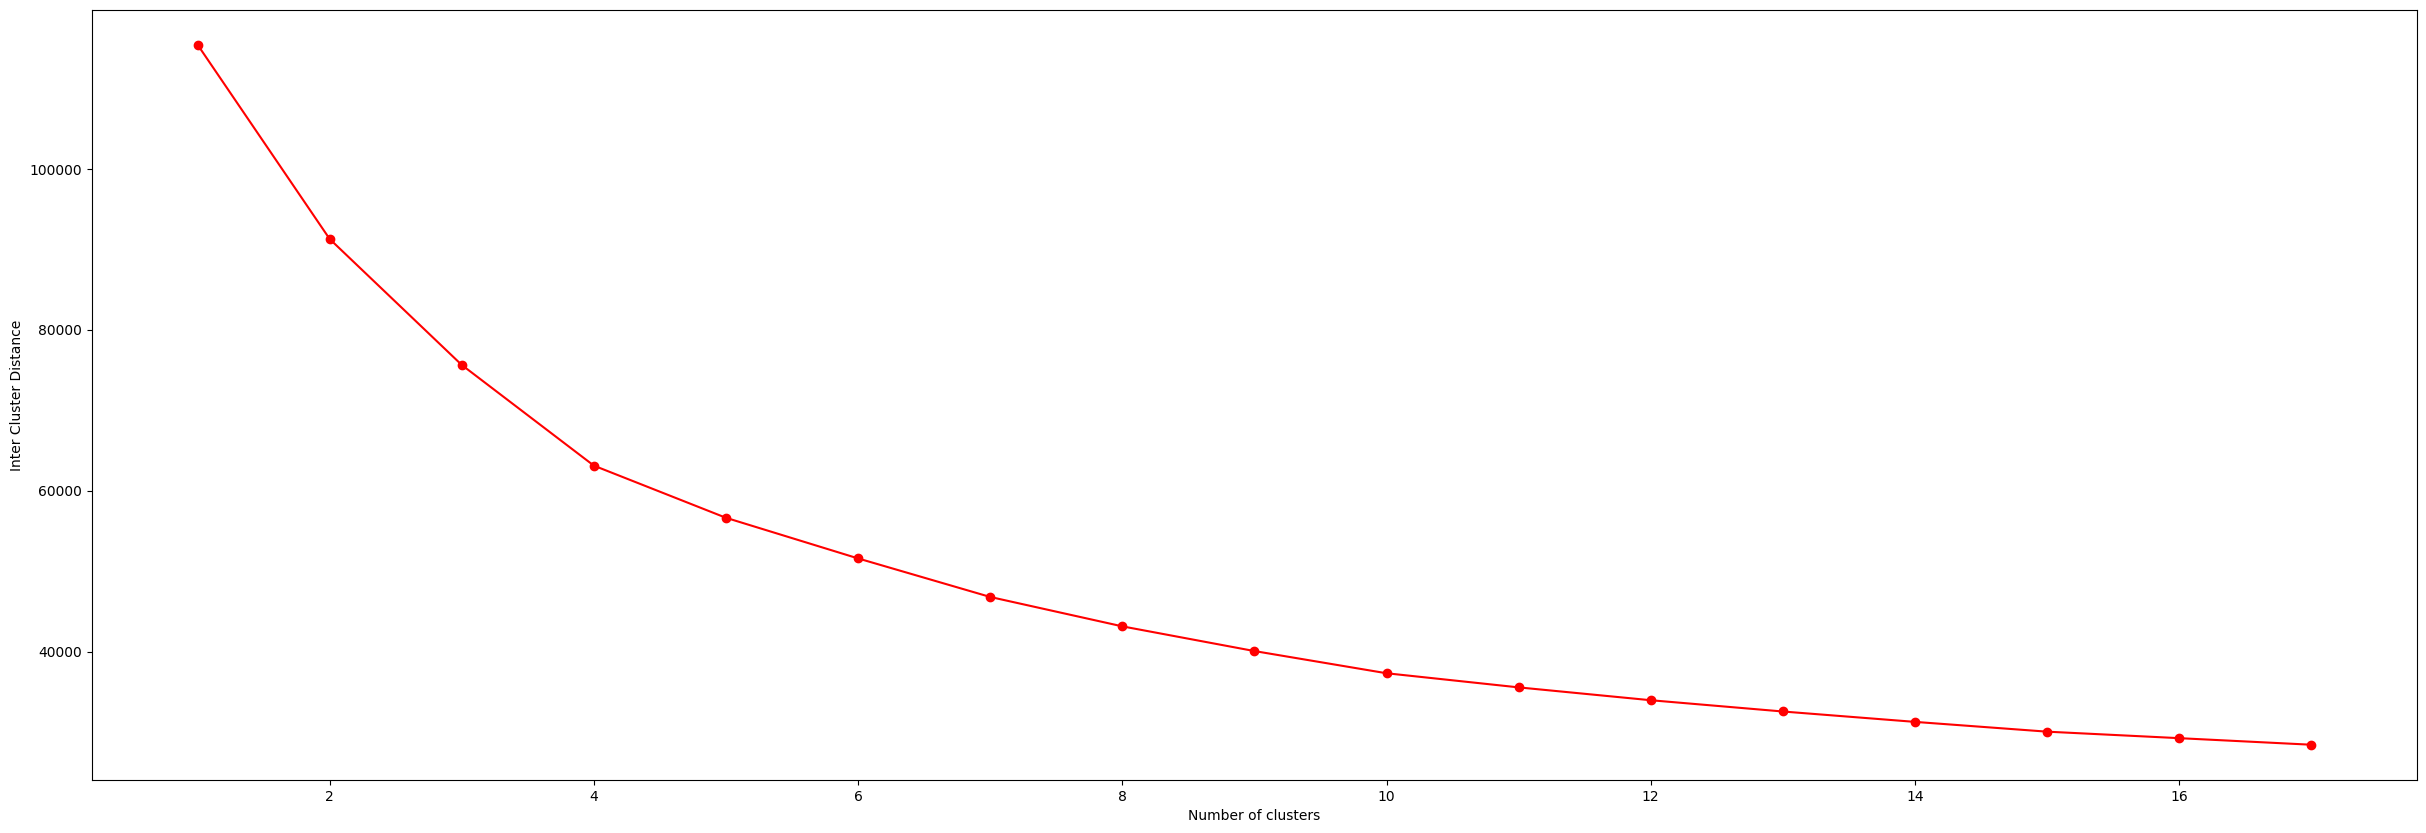

In [15]:
from sklearn.cluster import KMeans

interclusterdistance = []

for clusters in range(1,18):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(pca_df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 18), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

In [16]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
km.fit(pca_df)
y_pred = km.predict(pca_df)

In [18]:
pca_df['clusters'] = y_pred
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,clusters
0,-1.684484,-1.070217,0.469997,0.686725,0.056054,0.080316,1
1,-1.132568,2.510222,0.603830,-0.104391,0.701248,-1.074136,3
2,0.968926,-0.383446,0.086174,1.252351,-2.160177,-0.394585,0
3,-0.897248,-0.017765,1.526944,1.031338,0.189523,-0.198575,1
4,-1.600519,-0.681375,0.340010,1.024974,-0.436711,0.078247,1
...,...,...,...,...,...,...,...
8944,-0.363616,-2.011357,-0.972364,-2.751540,0.025593,2.675851,0
8945,-0.590115,-1.696260,-1.188656,-2.046315,-0.239430,3.267278,0
8946,-0.929900,-1.806109,-0.456198,-2.306577,0.128605,2.984803,0
8947,-2.338056,-0.650937,0.980592,-1.844275,-0.171603,3.185369,4


In [19]:
pca_df['clusters'].value_counts()

clusters
1    3085
0    2806
4    1356
3     961
2     711
5      30
Name: count, dtype: int64

<Axes: xlabel='pc6', ylabel='clusters'>

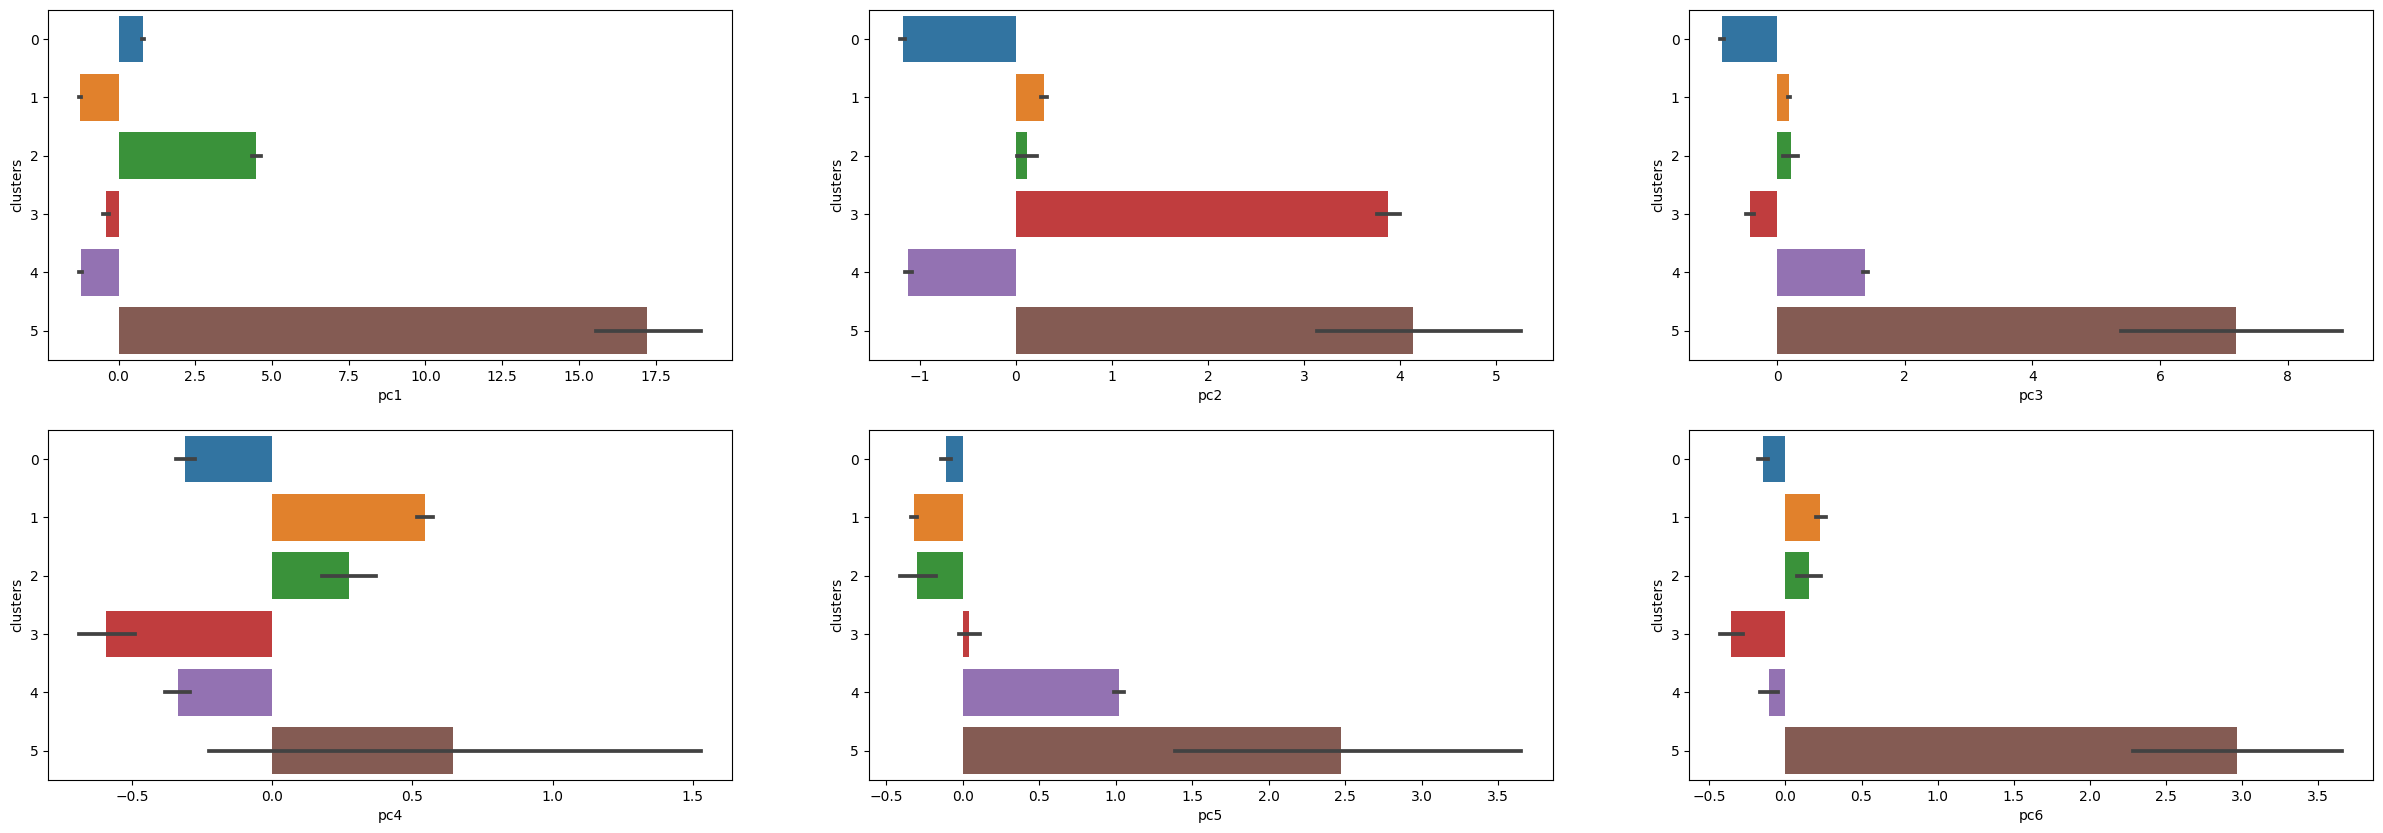

In [21]:
# 변수 별 클러스터 차이

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30, 10)

sns.barplot(data = pca_df, y = 'clusters', x = 'pc1', orient = 'h', ax = ax1)
sns.barplot(data = pca_df, y = 'clusters', x = 'pc2', orient = 'h', ax = ax2)
sns.barplot(data = pca_df, y = 'clusters', x = 'pc3', orient = 'h', ax = ax3)
sns.barplot(data = pca_df, y = 'clusters', x = 'pc4', orient = 'h', ax = ax4)
sns.barplot(data = pca_df, y = 'clusters', x = 'pc5', orient = 'h', ax = ax5)
sns.barplot(data = pca_df, y = 'clusters', x = 'pc6', orient = 'h', ax = ax6)

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_score = silhouette_samples(pca_df, pca_df['clusters'])
print('silhouette_samples( ) return 값의 shape' , sil_score.shape)

silhouette_samples( ) return 값의 shape (8949,)


In [23]:
pca_df['silhouette_coeff'] = sil_score   # 실루엣 점수가 0.5 넘으면 좋음
print(np.mean(sil_score))
print(silhouette_score(pca_df, pca_df['clusters']))

0.3487942655879628
0.3486161541504354


In [25]:
pca_df.groupby('clusters')['silhouette_coeff'].mean()

clusters
0    0.295485
1    0.426742
2    0.196092
3    0.216844
4    0.456114
5    0.314415
Name: silhouette_coeff, dtype: float64

In [26]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

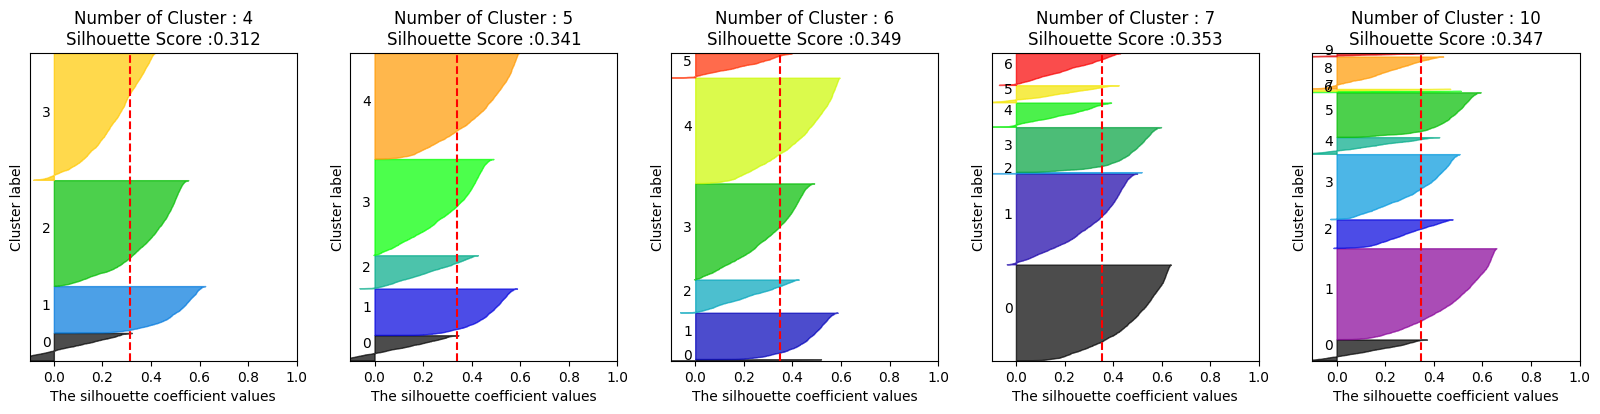

In [28]:
# https://velog.io/@gangjoo/ML-%EA%B5%B0%EC%A7%91%ED%99%94-%EC%8B%A4%EB%A3%A8%EC%97%A3-%EB%B6%84%EC%84%9D-Silhouette-Analysis
visualize_silhouette([4, 5, 6, 7, 10], pca_df)

## 2. DBSCAN

In [86]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(pca_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [61]:
len(y_dbscan_pred)

8949

In [87]:
dbscan_df = pd.DataFrame(df, columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541,0
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,0
5,0.117792,0.517980,0.154433,-0.356957,1.019726,-0.466805,0.439186,-0.678716,0.550677,-0.675294,-0.476083,-0.270002,-0.740516,-0.115122,0.673454,-0.525588,0.360541,0
6,-0.450349,0.517980,2.849232,3.500337,0.306600,-0.466805,1.269742,2.673295,1.599083,-0.675294,-0.476083,1.982870,2.474996,1.596189,-0.272267,2.893277,0.360541,-1
7,0.124434,0.517980,-0.265429,-0.356957,0.027740,-0.466805,1.269742,-0.678716,1.599083,-0.675294,-0.476083,-0.109082,-0.603101,-0.364169,-0.129300,-0.525588,0.360541,0
8,-0.264103,0.517980,-0.066379,0.041561,-0.233448,-0.466805,-0.391372,-0.399383,-0.288047,-0.675294,-0.476083,-0.390691,0.688601,-0.360986,-0.223509,-0.525588,0.360541,0
9,-0.678570,-1.401674,0.130245,0.415149,-0.454607,-0.466805,-0.806649,-0.120047,-0.917090,-0.675294,-0.476083,-0.471151,1.787921,-0.196395,-0.314119,-0.525588,0.360541,0


In [85]:
# eps=1,min_samples=6
dbscan_df['clusters'].value_counts()  # 이상치의 클러스터 번호 == -1

clusters
 0    7969
-1     968
 2       5
 3       4
 1       3
Name: count, dtype: int64

In [88]:
# eps=0.8,min_samples=6
dbscan_df['clusters'].value_counts()

clusters
 0    7281
-1    1615
 2       9
 8       8
 1       7
 3       6
 9       6
 4       5
 7       5
 5       4
 6       3
Name: count, dtype: int64

In [82]:
# eps=1.2,min_samples=6
dbscan_df['clusters'].value_counts()

clusters
 0    8323
-1     618
 1       8
Name: count, dtype: int64

In [90]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_score = silhouette_samples(dbscan_df, dbscan_df['clusters'])
print('silhouette_samples( ) return 값의 shape' , sil_score.shape)

silhouette_samples( ) return 값의 shape (8949,)


In [91]:
dbscan_df['silhouette_coeff'] = sil_score   # 실루엣 점수가 0.5 넘으면 좋음
print(np.mean(sil_score))
print(silhouette_score(dbscan_df, dbscan_df['clusters']))

0.11485887616650979
0.11880347900313888


In [93]:
dbscan_df.groupby('clusters')['silhouette_coeff'].mean()

clusters
-1   -0.261492
 0    0.194253
 1    0.639697
 2    0.656956
 3    0.621177
 4    0.614596
 5    0.621198
 6    0.601790
 7    0.731520
 8    0.829524
 9    0.675365
Name: silhouette_coeff, dtype: float64

## 3. Hierarchical Clustering

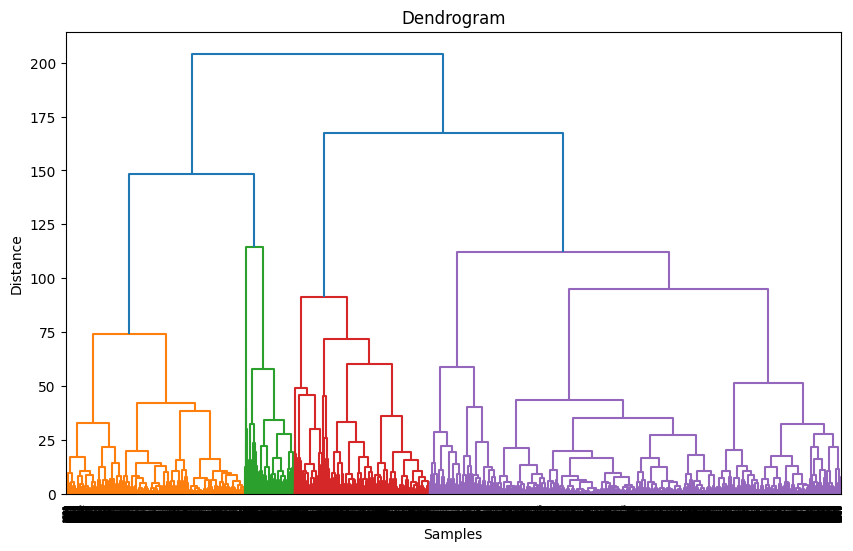

In [118]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
linkage_matrix = linkage(pca_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [119]:
# Initialize the Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=6)

# Fit the Hierarchical model to the scaled data
hierarchical.fit(pca_df)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_

In [121]:
hierarchical_labels

array([0, 2, 1, ..., 5, 5, 5], dtype=int64)

In [124]:
hierarchical_df = pd.DataFrame(df, columns = df.columns)
hierarchical_df['clusters'] = hierarchical_labels
hierarchical_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,2
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541,1
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,0
5,0.117792,0.517980,0.154433,-0.356957,1.019726,-0.466805,0.439186,-0.678716,0.550677,-0.675294,-0.476083,-0.270002,-0.740516,-0.115122,0.673454,-0.525588,0.360541,0
6,-0.450349,0.517980,2.849232,3.500337,0.306600,-0.466805,1.269742,2.673295,1.599083,-0.675294,-0.476083,1.982870,2.474996,1.596189,-0.272267,2.893277,0.360541,3
7,0.124434,0.517980,-0.265429,-0.356957,0.027740,-0.466805,1.269742,-0.678716,1.599083,-0.675294,-0.476083,-0.109082,-0.603101,-0.364169,-0.129300,-0.525588,0.360541,1
8,-0.264103,0.517980,-0.066379,0.041561,-0.233448,-0.466805,-0.391372,-0.399383,-0.288047,-0.675294,-0.476083,-0.390691,0.688601,-0.360986,-0.223509,-0.525588,0.360541,0
9,-0.678570,-1.401674,0.130245,0.415149,-0.454607,-0.466805,-0.806649,-0.120047,-0.917090,-0.675294,-0.476083,-0.471151,1.787921,-0.196395,-0.314119,-0.525588,0.360541,0


In [127]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_score = silhouette_samples(hierarchical_df, hierarchical_df['clusters'])
print('silhouette_samples( ) return 값의 shape' , sil_score.shape)

silhouette_samples( ) return 값의 shape (8949,)


In [128]:
hierarchical_df['silhouette_coeff'] = sil_score   # 실루엣 점수가 0.5 넘으면 좋음
print(np.mean(sil_score))
print(silhouette_score(hierarchical_df, hierarchical_df['clusters']))

0.23028673968293598
0.23039021242197177


In [129]:
hierarchical_df.groupby('clusters')['silhouette_coeff'].mean()

clusters
0    0.309114
1    0.230773
2    0.024721
3    0.078535
4    0.165982
5    0.346807
Name: silhouette_coeff, dtype: float64